# Assignment 3
*Topics: difference formulas, finite difference method, interpolation*

In this assignment, we will learn how to use linear algebra to compute numberical solutions of differential equations. The method we will use is called the *finite difference method* and is explained in detail in Section 1.5 of the New Notes (posted on canvas). 

For details on how to upload your notebook back to canvas, check the canvas homepage for a quick tutorial. For additional help with the jupyter workflow and python in general, attend an office hour at 6pm PST on Wednesday.

*Double check your variable names, and don't import extra libraries!*


In [7]:
import numpy as np
from math import *
from matplotlib import pyplot as plt

**Exercise 1**

For a differentiable function $f$, recall the *forward*
$$f'(x) \approx \frac{f(x+h)-f(x)}{h},$$
*backward*
$$f'(x) \approx \frac{f(x)-f(x-h)}{h},$$
and *central* 
$$f'(x) \approx \frac{f(x+h)-f(x-h)}{2h},$$
difference formulas. In this exercise we'll compare the above formulas for the function $f(x) = \cos^3(2x)$.

**Exercise 1(a)** Approximate the value of $f'(x)$ at $x = 0,0.2,0.4$ using the forward difference formula and $h = 0.02$. If your approximations are $a,b,c$ for $x = 0,0.2,0.4$ respectively, record you answer in the form FV = [a,b,c]. 

Note: because we have imported all of math, we have the cosine function at our disposal. The code x = cos(0.4) will assign x the value of cos(0.4), which is about 0.92.



In [2]:
# YOUR CODE HERE
def fwdiff(f, x, h = 0.02):
    return ( f(x+h) - f(x) ) / h
f = lambda x: (cos(2 * x)) ** 3
FV = [fwdiff(f, x) for x in np.arange(0, 0.5, 0.2)]
print(np.arange(0, 0.5, 0.2))
print(FV)

[0.  0.2 0.4]
[-0.11988805204000141, -2.0388786896633313, -2.041124650952708]


In [3]:
assert isinstance(FV,list), "Make sure your FV is a list. Make with square brackets."
print("Checkpoint 1.1 passed: FV data type is good!")



Checkpoint 1.1 passed: FV data type is good!


**Exercise 1(b)** Approximate the value of $f'(x)$ at $x = 0,0.2,0.4$ using the backward difference formula and $h = 0.02$. If your approximations are $a,b,c$ for $x = 0,0.2,0.4$ respectively, record you answer in the form BV = [a,b,c]. 

In [3]:
# YOUR CODE HERE
def bwdiff(f, x, h = 0.02):
    return ( f(x) - f(x-h) ) / h
BV = [bwdiff(f, x) for x in np.arange(0, 0.5, 0.2)]
BV

[0.11988805204000141, -1.9184762340276884, -2.131899489936495]

In [5]:
assert isinstance(BV,list), "Make sure your BV is a list. Make with square brackets."
print("Checkpoint 1.2 passed: BV data type is good!")


Checkpoint 1.2 passed: BV data type is good!


**Exercise 1(c)** Approximate the value of $f'(x)$ at $x = 0,0.2,0.4$ using the central difference formula and $h = 0.02$. If your approximations are $a,b,c$ for $x = 0,0.2,0.4$ respectively, record you answer in the form CV = [a,b,c]. 

In [4]:
# YOUR CODE HERE
def ctdiff(f, x, h = 0.02):
    return ( f(x+h) - f(x-h) ) / (2*h)
CV = [ctdiff(f, x) for x in np.arange(0, 0.5, 0.2)]
CV

[0.0, -1.9786774618455099, -2.0865120704446016]

In [7]:
assert isinstance(CV,list), "Make sure your BV is a list. Make with square brackets."
print("Checkpoint 1.3 passed: CV data type is good!")


Checkpoint 1.3 passed: CV data type is good!


**Exercise 1(d)** Calculate the exactly value of $f'(x)$ at $x = 0,0.2,0.4$. Let 

 $$ERF = |FV[0] - f'(0)| + |FV[1] - f'(0.2)| + |FV[2] - f'(0.4)|,$$
 
 be the cumulative error of the forward difference method. Similarly, let 
 
  $$ERB = |BV[0] - f'(0)| + |BV[1] - f'(0.2)| + |BV[2] - f'(0.4)|,$$
  
  and 
  
   $$ERC = |CV[0] - f'(0)| + |CV[1] - f'(0.2)| + |CV[2] - f'(0.4)|,$$
   
   be the cumulative error of the backward and central difference methods. Note which of the methods gave the smallest cumulative error. Assign the variable MERR the value of $\min\{ ERF,ERB,ERC\}$, i.e. the smallest value among $ERF,ERB,ERC$.
   
Note, the python function abs() returns the absolute value of a number. For example abs(-3.1)= 3.1. Also, the python function min() returns the smallest input. For example, min(-10,0.01,2) = -10. 
    
    

In [5]:
# YOUR CODE HERE
f_prime = lambda x: 3 * (cos(2*x))**2 * (-1*sin(2*x)) * 2
f_prime_arr = [f_prime(x) for x in np.arange(0, 0.5, 0.2)]
ERF = sum([abs(FV[i] - f_prime_arr[i]) for i in np.arange(3)])
ERB = sum([abs(BV[i] - f_prime_arr[i]) for i in np.arange(3)])
ERC = sum([abs(CV[i] - f_prime_arr[i]) for i in np.arange(3)]) #central error is smallest
MERR = min(ERF, ERB, ERC)

In [6]:
assert isinstance(MERR,float), "Make sure your MERR is just a number."
print("Checkpoint 1.4 passed: MERR data type is good!")


Checkpoint 1.4 passed: MERR data type is good!


**Finite Difference Method**

Consider a second order linear differential equation with boundary conditions

$$
y'' + p(t)y' + q(t)y = r(t) \ \ , \ \ y(t_0) = \alpha \ \ , \ \ y(t_f) = \beta
$$

The [finite difference method](https://en.wikipedia.org/wiki/Finite_difference_method) is:

1. Discretize the domain: choose $N$, let $h = (t_f - t_0)/(N+1)$ and define $t_k = t_0 + kh$.
2. Let $y_k \approx y(t_k)$ denote the approximation of the solution at $t_k$.
3. Substitute finite difference formulas into the equation to define an equation at each $t_k$.
4. Rearrange the system of equations into a linear system $A \mathbf{y} = \mathbf{b}$ and solve for
$$
\mathbf{y} = \begin{bmatrix} y_1 & y_2 & \cdots & y_N \end{bmatrix}^T
$$



**General formula** 

*(See "New Notes", p.28 for the following derivation and p.29-30 for an example.)*

Consider the general form of a second order linear ordinary differential equation with boundary conditions
$$
y'' + p(t)y' + q(t)y = r(t) \ \ , \ \ y(t_0) = \alpha \ , \ \ y(t_f) = \beta
$$
Choose $N$ and let  $\displaystyle h = \frac{t_f - t_0}{N+1}$ and define $t_k = t_0 + kh$. Let $y_k$ denote an approximation of $y(t_k)$. Note that the boundary conditions give us $y_0 = \alpha$ and $y_{N+1} = \beta$ and let
$$
\boldsymbol{y} = \begin{bmatrix} y_1 & y_2 & \cdots & y_N \end{bmatrix}^T
$$
Let $p_k = p(t_k)$, $q_k = q(t_k)$ and $r_k = r(t_k)$, and substitute the central difference formulas for both $y''$ and $y'$ at $t_k$ into the differential equation
$$
\frac{y_{k+1} -2y_k + y_{k-1}}{h^2} + p_k \frac{y_{k+1} - y_{k-1}}{2h} + q_k y_k = r_k
$$
Rearrange the equation
\begin{align*}
y_{k+1} -2y_k + y_{k-1} + \frac{h p_k}{2} \left( y_{k+1} - y_{k-1} \right) + h^2q_k y_k &= h^2 r_k \\
\left( 1 - \frac{h p_k}{2} \right) y_{k-1} + (h^2q_k - 2)y_k + \left(1 + \frac{h p_k}{2} \right)y_{k+1} &= h^2 r_k
\end{align*}
Introduce the notation
$$
a_k = 1 - \frac{h p_k}{2}
\hspace{10mm}
b_k = h^2q_k - 2
\hspace{10mm}
c_k = 1 + \frac{h p_k}{2}
$$
Use the boundary conditions $y_0 = \alpha$ and $y_{N+1} = \beta$ and rearrange the equations
$$
\begin{array}{rrrrcrrrrcc}
b_1 y_1 & + & c_1 y_2 & & & & & & & = & h^2 r_1 - \left( 1 - h p_1/2 \right) \alpha \\
a_2 y_1 & + & b_2 y_2 & + & c_2 y_3 & & & & & = & h^2 r_2 \\
& & & & \ddots & & & & & \vdots & \\
& & & & a_{N-1}y_{N-2} & + & b_{N-1}y_{N-1} & + & c_{N-1}y_N & = & h^2 r_{N-1} \\
& & & & & & a_Ny_{N-1} & + & b_Ny_N & = & h^2 r_N - \left( 1 + h p_N/2 \right) \beta
\end{array}
$$
Rewrite in matrix form $A \boldsymbol{y} = \boldsymbol{b}$ where
$$
A =
\left[ \begin{array}{rrcrr}
b_1 & c_1 & & & \\
a_2 & b_2 & c_2 & & \\
& & \ddots & & \\
& & a_{N-1} & b_{N-1} & c_{N-1} \\
& & & a_N & b_N
\end{array} \right]
\hspace{10mm}
\boldsymbol{b} = 
\begin{bmatrix}
h^2 r_1 - \left( 1 - h p_1/2 \right) \alpha \\ h^2 r_2 \\ \vdots \\ h^2 r_{N-1} \\ h^2 r_N - \left( 1 + h p_N/2 \right) \beta
\end{bmatrix}
$$

**Exercise 2** 

In this exercise we'll use the finite difference method to approximate a solution to the second order linear differential equation 

$$ y'' = 4\cos(2x) + 6x, \quad \text{with boundary conditions} \quad y(1) = 2\sin^2(1) + 1, y(3) = 2\sin^2(3) + 27.$$


**Exercise 2(a)** Use the finite difference method with $N = 4$ to find approximate values of $y(1.4),y(1.8),y(2.2),y(2.6)$. 

First you'll need to find the appropriate $4 \times 4$ matrix $A$. Assign the variable $A21$ the np.array matrix $A$. 

Second, record your approximations as the variable A22 = [a,b,c,d] where $a,b,c,d$ are the approximations you found for $y(1.4),y(1.8),y(2.2),y(2.6)$ respectively. 

Both answers can be recorded in the below box, we'll give immediate feedback for each. 



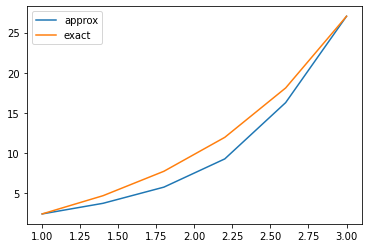

In [11]:
# YOUR CODE HERE
N = 4
x0 = 1
xf = 3
h = (xf-x0) / (N+1)
t = lambda k: x0 + k * h
p_k = 0
q_k = 0
r = lambda x: 4 * cos(2*x) + 6*x
r_k = lambda k: r(t(k))
a_k = 1 - h*p_k/2
b_k = h**2 * q_k - 2
c_k = 1 + h*p_k/2
A21 = np.array([
    [b_k, c_k, 0  , 0  ],
    [a_k, b_k, c_k, 0  ],
    [0  , a_k, b_k, c_k],
    [0  , 0  , a_k, b_k],
])

alpha = 2 * sin(1)**2 + 1
beta = 2 * sin(3)**2 + 27

bVec = np.array([
    [h**2 * r(1) - (1 - h * p_k/2) * alpha],
    [h**2 * r(2)],
    [h**2 * r(3)],
    [h**2 * r(4) - (1 + h * p_k/2) * beta]
])

A22 = np.linalg.solve(A21, bVec).flatten().tolist()
xArr = np.arange(1, 3.1, 0.4)
sn = lambda x: x**3 - cos(2*x) + 1
plt.figure()
plt.plot(xArr, [alpha] + A22 + [beta], label = "approx")
plt.plot(xArr, [sn(x) for x in xArr], label = "exact")
plt.legend()

In [11]:
assert isinstance(A21,np.ndarray), "Check that your A21 is a np.array."
print("Checkpoint 2.1 passed: Good data type.")

assert isinstance(A22,list), "Check that your A22 is a list."
print("Checkpoint 2.2 passed: Good data type.")


Checkpoint 2.1 passed: Good data type.
Checkpoint 2.2 passed: Good data type.


**Exercise 2(b)** Use the finite difference method with $N = 7$ to find approximate values of $y(1.25),y(1.5),y(1.75),y(2),y(2.25),y(2.5),y(2.75)$. Record your answer as the variable B2 = [a,b,c,d,e,f,g] where $a,b,c,d,e,f,g$ are the approximations you found for $y(1.25),y(1.5),y(1.75),y(2),y(2.25),y(2.5),y(2.75)$ respectively.

[1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.  ]


array([ 0.        , -0.01175144, -0.01936487, -0.02186487, -0.01952795,
       -0.01381489, -0.00701304, -0.00167633,  0.        ])

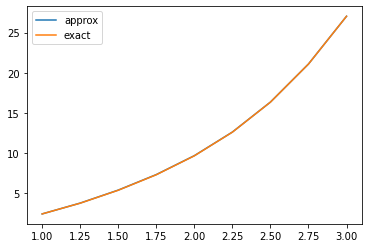

In [13]:
# YOUR CODE HERE
N = 7
h = (xf-x0) / (N+1)
t = lambda k: x0 + k * h
r = lambda x: 4 * cos(2*x) + 6*x
r_k = lambda k: r(t(k))
a_k = 1 - h*p_k/2
b_k = h**2 * q_k - 2
c_k = 1 + h*p_k/2

def makeA(dim):
    A = np.zeros((dim, dim))
    for i in range(dim):
        A[i, max(0, i-1)] = a_k
        A[i, min(dim - 1, i + 1)] = c_k
        A[i, i] = b_k
    return A
A23 = makeA(7)

alpha = 2 * sin(1)**2 + 1
beta = 2 * sin(3)**2 + 27

def makeB(dim, r, alpha, beta):
    B = [h ** 2 * r(i) for i in range(1, dim+1)]
    B[0] = h**2 * r(1) - (1 - h * p_k/2) * alpha
    B[-1] = h**2 * r(dim) - (1 + h * p_k/2) * beta
    return B

bVec2 = makeB(7, r_k, alpha, beta)

B2 = np.linalg.solve(A23, bVec2).flatten().tolist()

xArr = np.linspace(1, 3, 9)
print(xArr)
sn = lambda x: x**3 - cos(2*x) + 1
plt.figure()
plt.plot(xArr, [alpha] + B2 + [beta], label = "approx")
plt.plot(xArr, [sn(x) for x in xArr], label = "exact")
plt.legend()
np.subtract([sn(x) for x in xArr], [alpha] + B2 + [beta] )

In [13]:
assert isinstance(B2,list), "Check that your B2 is a list."
print("Checkpoint 2.3 passed: Good data type.")


Checkpoint 2.3 passed: Good data type.


**Exercise 2(c)** Let a,b,c,d,e,f,g be your approximations for $y(1.25),y(1.5),y(1.75),y(2),y(2.25),y(2.5),y(2.75)$ in the above question. Use Vandermonde Interpolation to find a degree 6 polynomial that interpolates the set of points 
$$ \{ (1.25,a), (1.5,b), (1.75,c), (2,d), (2.25,e), (2.5,f), (2.75,g) \}. $$

If the polynomial you find is 
$$ C_0 + C_1 x + C_2 x^2 + C_3 x^3 + C_4 x^4 + C_5 x^5 + C_6 x^6,$$

assign the variable INTPOLY2 the value [C_0,C_1,C_2,C_3,C_4,C_5,C_6]. 

Note that here we are not adding the boundary points of the differential equation into our interpolation.



In [16]:
# YOUR CODE HERE
print(np.arange(1.25, 2.8, 0.25))
A24 = np.vander(np.arange(1.25, 2.8, 0.25), increasing=True)
INTPOLY2 = np.linalg.solve(A24, B2).flatten().tolist()

[1.25 1.5  1.75 2.   2.25 2.5  2.75]


In [15]:
assert isinstance(INTPOLY2,list), "Check that your INTPOLY2 is a list."
print("Checkpoint 2.4 passed: Good data type.")


Checkpoint 2.4 passed: Good data type.


**Exercise 2(d)** This differential equation has the exact solution $y(x) = 2\sin^2(x) + x^3$. Lets do a quick calculation to track the average discrepancy between our interpolating polynomial and the exact solution. If $y(x)$ is the exact solution and $p(x)$ is your interpolating polynomial, calculate an average error:

$$ D2 = \frac{1}{4} \left( |p(1.3) - y(1.3)| + |p(1.7) - y(1.7)| + |p(2.3) - y(2.3)| + |p(2.7)-y(2.7)| \right) .$$

Record your answer by assigning the variable D2 the value you calculate for the above expression. 






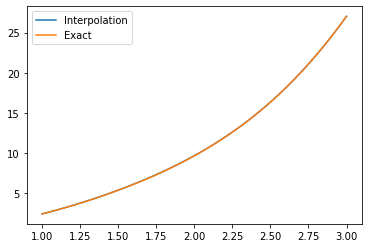

In [17]:
# YOUR CODE HERE
intPolyFn = np.polynomial.polynomial.Polynomial(INTPOLY2)
y = lambda x: 2 * sin(x)**2 + x**3

xArr = np.linspace(1, 3, 50)

D2 = (1/4) * sum(abs(intPolyFn(x) - y(x)) for x in [1.3, 1.7, 2.3, 2.7])
plt.figure()
plt.plot(xArr, intPolyFn(xArr), label = "Interpolation")
plt.plot(xArr, [sn(x) for x in xArr], label = "Exact")
plt.legend()

In [17]:
assert isinstance(D2,float), "Check that your D2 is a number."
print("Checkpoint 2.5 passed: Good data type.")


Checkpoint 2.5 passed: Good data type.


**Exercise 3** 

This exercise will be similar to Exercise 2. We'll use the finite difference method to approximate a solution to the second order linear differential equation 

$$ y'' + \sin(t) y ' + t^2 y = 4, \quad \text{with boundary conditions} \quad y(0) = 0.5, y'(1) = 3.$$


**Exercise 3(a)** Use the finite difference method with $N = 4$ to find approximate values of $y(0.2),y(0.4),y(0.6),y(0.8),y(1)$. 


First you'll need to find the appropriate $5 \times 5$ matrix $A$. Assign the variable $A31$ the np.array matrix $A$. 

Second, record your approximations as the variable A32 = [a,b,c,d,e] where $a,b,c,d,e$ are the approximations you found for $y(0.2),y(0.4),y(0.6),y(0.8),y(1)$ respectively.

Hint: To use the boundary condition $y'(1) = 3$, use the backward difference formula. We know that
$$ y'(1) \approx \frac{y(1) - y(0.8)}{0.2} ,$$
this is a linear equation that can be added as a row in our `finite difference matrix'.




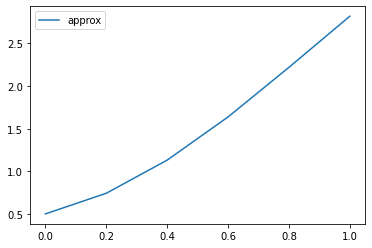

In [19]:
# YOUR CODE HERE
N = 4
x0 = 0
xf = 1
h = (xf-x0) / (N+1)
t_k = lambda k: x0 + k * h
p_k = lambda k: sin(t_k(k))
q_k = lambda k: (t_k(k))**2
r_k = lambda k: 4
a_k = lambda k: 1 - h*p_k(k)/2
b_k = lambda k: h**2 * q_k(k) - 2
c_k = lambda k: 1 + h*p_k(k)/2

def makeA(dim):
    A = np.zeros((dim, dim))
    for i in range(dim):
        A[i, max(0, i-1)] = a_k(i+1)
        A[i, min(dim - 1, i + 1)] = c_k(i+1)
        A[i, i] = b_k (i+1)
    A[-1, -2] = -1 #added backwards estimation BC here
    A[-1, -1] = 1
    return A

A31 = makeA(5)

alpha = 0.5

def makeB(dim, r, alpha):
    B = [h ** 2 * r(i) for i in range(1, dim+1)]
    B[0] = h**2 * r(1) - (1 - h * p_k(1)/2) * alpha
    B[-1] = h * 3 # added boundary condition here
    return B

bVec3 = makeB(5, r_k, alpha)

A32 = np.linalg.solve(A31, bVec3).flatten().tolist()
xArr = np.linspace(0, 1, 6)

plt.figure()
plt.plot(xArr, [alpha] + A32, label = "approx")
plt.legend()

In [19]:
assert isinstance(A31,np.ndarray), "Check that your A31 is a np.array."
print("Checkpoint 3.1 passed: Good data type.")

assert isinstance(A32,list), "Check that your A32 is a list."
print("Checkpoint 3.2 passed: Good data type.")


Checkpoint 3.1 passed: Good data type.
Checkpoint 3.2 passed: Good data type.


**Exercise 3(b)** Use the finite difference method with $N = 7$ to find approximate values of $y(0.125),y(0.25),y(0.375),y(0.5),y(0.625),y(0.75),y(0.875),y(1)$. Record your answer as the variable B3 = [a,b,c,d,e,f,g,h] where $a,b,c,d,e,f,g,h$ are the approximations you found for $y(0.125),y(0.25),y(0.375),y(0.5),y(0.625),y(0.75),y(0.875),y(1)$ respectively.

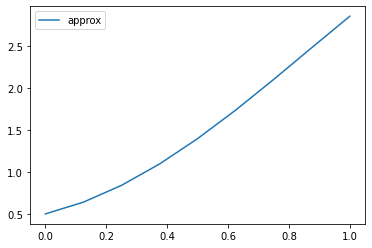

In [21]:
# YOUR CODE HERE
N = 7
x0 = 0
xf = 1
h = (xf-x0) / (N+1)
t_k = lambda k: x0 + k * h
p_k = lambda k: sin(t_k(k))
q_k = lambda k: (t_k(k))**2
r_k = lambda k: 4
a_k = lambda k: 1 - h*p_k(k)/2
b_k = lambda k: h**2 * q_k(k) - 2
c_k = lambda k: 1 + h*p_k(k)/2

def makeA(dim):
    A = np.zeros((dim, dim))
    for i in range(dim):
        A[i, max(0, i-1)] = a_k(i+1)
        A[i, min(dim - 1, i + 1)] = c_k(i+1)
        A[i, i] = b_k (i+1)
    A[-1, -2] = -1 #added backwards estimation BC here
    A[-1, -1] = 1
    return A

A33 = makeA(8)

alpha = 0.5

def makeB(dim, r, alpha):
    B = [h ** 2 * r(i) for i in range(1, dim+1)]
    B[0] = h**2 * r(1) - (1 - h * p_k(1)/2) * alpha
    B[-1] = h * 3 # added boundary condition here
    return B

bVec4 = makeB(8, r_k, alpha)

B3 = np.linalg.solve(A33, bVec4).flatten().tolist()
xArr = np.linspace(0, 1, 9)

plt.figure()
plt.plot(xArr, [alpha] + B3, label = "approx")
plt.legend()

In [21]:
assert isinstance(B3,list), "Check that your B2 is a list."
print("Checkpoint 3.3 passed: Good data type.")


Checkpoint 3.3 passed: Good data type.


**Exercise 3(c)** Let a,b,c,d,e,f,g,h be your approximations for $y(0.125),y(0.25),y(0.375),y(0.5),y(0.625),y(0.75),y(0.875),y(1)$ in the above question. Use Vandermonde Interpolation to find a degree 7 polynomial that interpolates the set of points 
$$ \{ (0.125,a), (0.25,b), (0.375,c), (0.5,d), (0.625,e), (0.75,f), (0.875,g), (1,h) \}. $$

If the polynomial you find is 
$$ C_0 + C_1 x + C_2 x^2 + C_3 x^3 + C_4 x^4 + C_5 x^5 + C_6 x^6+C_7x^7,$$

assign the variable INTPOLY3 the value [C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7]. 

Note here that we are including $x = 1$ in the interpolation, but not $x = 0$. 



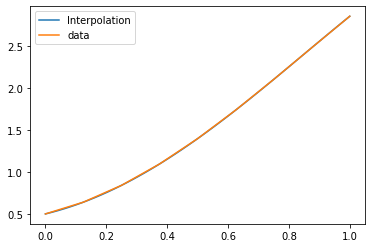

In [23]:
# YOUR CODE HERE
A34 = np.vander(np.arange(0.125, 1.01, 0.125), increasing=True)
INTPOLY3 = np.linalg.solve(A34, B3).flatten().tolist()

# YOUR CODE HERE
intPolyFn = np.polynomial.polynomial.Polynomial(INTPOLY3)

plt.figure()
plt.plot(np.linspace(0, 1), intPolyFn(np.linspace(0, 1)), label = "Interpolation")
plt.plot(xArr, [alpha] + B3, label = "data")
plt.legend()

In [23]:
assert isinstance(INTPOLY3,list), "Check that your INTPOLY2 is a list."
print("Checkpoint 3.4 passed: Good data type.")


Checkpoint 3.4 passed: Good data type.
